In [1]:
import numpy as np
import pandas as pd 


In [2]:
result=pd.read_csv('/content/preprocessed_ade.csv')

In [3]:
result

,Unnamed: 0,observation,labels
0,12606,early phase ii semi double blind study of the ...,0
1,685,cessation of mtx therapy led to complete regre...,0
2,5127,cutaneous biopsy showed hyphae and round inclu...,0
3,3158,she was treated with acyclovir and subsequentl...,1
4,10685,cisplatin was substituted and the patient achi...,0
...,...,...,...
23511,982,ticlopidine induced aplastic anemia two new c...,1
23512,14487,the risks of sumatriptan administration in pat...,0
23513,4680,however the spectrum of hosts and clinical p...,0
23514,2588,antibiotic treatment should be continued,0


In [4]:
validation_data = result.sample(frac = 0.2)
result=result.drop(validation_data.index) 

In [5]:
validation_data

,Unnamed: 0,observation,labels
8085,13525,the other two patients developed immune relate...,0
4271,516,the day after clozapine was stopped while he...,1
6683,7626,they are usually localized reactions such as e...,0
13674,11616,toxic encephalopathy related to antihistamine ...,0
13794,1130,other explanations for an exaggerated and dela...,0
...,...,...,...
3512,4717,we present four cases in which the use of hepa...,1
21464,2459,of the eight patients in clinical trials fiv...,0
13711,2104,however they subsequently were shown to be a...,0
22150,6156,while the pathogenetic and clinical relationsh...,0


In [6]:
result

,Unnamed: 0,observation,labels
0,12606,early phase ii semi double blind study of the ...,0
1,685,cessation of mtx therapy led to complete regre...,0
2,5127,cutaneous biopsy showed hyphae and round inclu...,0
3,3158,she was treated with acyclovir and subsequentl...,1
4,10685,cisplatin was substituted and the patient achi...,0
...,...,...,...
23509,3056,we report a case of a patient with mild chroni...,1
23510,12159,naratriptan in the prophylaxis of transformed ...,0
23512,14487,the risks of sumatriptan administration in pat...,0
23513,4680,however the spectrum of hosts and clinical p...,0


In [7]:
sentences = result['observation'].tolist() 

In [8]:
sentences

['early phase ii semi double blind study of the new alkaline propanolamine derivative enciprazine   short communication',
 'cessation of mtx therapy led to complete regression of the tumor',
 'cutaneous biopsy showed hyphae and round inclusions stained with pas and gomori grocott within a polymorphous granuloma',
 'she was treated with acyclovir and subsequently developed vzv antigen positive zoster',
 'cisplatin was substituted and the patient achieved a complete response to therapy without further hypersensitivity',
 'so he underwent surgical treatment',
 'one case presented with stevens johnson syndrome   and the other had systemic papular erythema',
 'it draws the clinician is attention to unusual susceptibility to extrapyramidal side effects and suggests that if a child shows this type of susceptibility to one neuroleptic   he she may react similarly to other neuroleptics as well',
 'on december            he began therapy with recombinant ifn alpha at a dose of   miu three times 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=1000,ngram_range=(2,2))
x=tfidf_v.fit_transform(sentences).toarray()

In [10]:
x.shape

(18813, 1000)

In [11]:
y=result['labels']

In [12]:
y.shape

(18813,)

**SMOTE**

In [13]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [14]:
from imblearn.over_sampling import SMOTE 

In [15]:
smote = SMOTE(random_state=2021)
x, y = smote.fit_resample(x,y) 

In [16]:
x.shape

(26752, 1000)

In [17]:
y.shape

(26752,)

In [18]:
zerocount=0
onecount=0
for i in y:
  if i == 0:
    zerocount+=1
  else:
    onecount+=1
print("no of negative sample in training class is:",zerocount)
print("no of positive sample in training class is:",onecount)

no of negative sample in training class is: 13376
no of positive sample in training class is: 13376


**Creating  validation data**

In [19]:
y_val = validation_data['labels']

In [20]:
sentences_validation = validation_data['observation'].tolist() 

In [21]:
x_val=tfidf_v.fit_transform(sentences_validation).toarray()

In [22]:
x_val.shape

(4703, 1000)

In [23]:
print(x_val.shape)
print(y_val.shape)
print(x.shape)
print(y.shape)

(4703, 1000)
(4703,)
(26752, 1000)
(26752,)


**LOGISTIC REGRESSION**

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model=LogisticRegression(max_iter=1000)

In [26]:
log_model.fit(x,y)

LogisticRegression(max_iter=1000)

In [27]:
log_y_pred=log_model.predict(x_val) 

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [29]:
print(confusion_matrix(y_val,log_y_pred)) 

[[2307 1030]
 [ 837  529]]


In [30]:
print((classification_report(y_val,log_y_pred)))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      3337
           1       0.34      0.39      0.36      1366

    accuracy                           0.60      4703
   macro avg       0.54      0.54      0.54      4703
weighted avg       0.62      0.60      0.61      4703



In [31]:
#calculate training error 
log_y_pred_train = log_model.predict(x) 

In [32]:
accuracy_score(y,log_y_pred_train) 

0.7523207066926186

**DECISION TREE**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_model=DecisionTreeClassifier()

In [35]:
dt_model.fit(x,y) 

DecisionTreeClassifier()

In [36]:
dt_pred=dt_model.predict(x_val)

In [37]:
print(classification_report(y_val,dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      3337
           1       0.35      0.34      0.35      1366

    accuracy                           0.63      4703
   macro avg       0.54      0.54      0.54      4703
weighted avg       0.62      0.63      0.62      4703



In [38]:
print(confusion_matrix(y_val,dt_pred)) 

[[2478  859]
 [ 902  464]]


In [39]:
#training error 
dt_pred_train = dt_model.predict(x) 


In [40]:
accuracy_score(y,dt_pred_train ) 

0.9512277287019015

**RANDOM FOREST**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc_model=RandomForestClassifier(n_estimators=1000)

In [43]:
rfc_model.fit(x,y)

RandomForestClassifier(n_estimators=1000)

In [44]:
rfc_pred=rfc_model.predict(x_val)

In [45]:
print(classification_report(y_val,rfc_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      3337
           1       0.41      0.33      0.37      1366

    accuracy                           0.67      4703
   macro avg       0.58      0.57      0.57      4703
weighted avg       0.65      0.67      0.66      4703



In [46]:
print(confusion_matrix(y_val,rfc_pred))

[[2696  641]
 [ 915  451]]


In [47]:
#training error 
rfc_train = rfc_model.predict(x)

In [48]:
accuracy_score(y,rfc_train)

0.9512277287019015

**NAIVE BAYES**

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [50]:
gnb_model=GaussianNB()
mnb_model=MultinomialNB()

In [51]:
gnb_model.fit(x,y)

GaussianNB()

In [52]:
mnb_model.fit(x,y)

MultinomialNB()

In [53]:
gnb_pred=gnb_model.predict(x_val)

In [54]:
mnb_pred=mnb_model.predict(x_val)

In [55]:
print(classification_report(y_val,gnb_pred))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65      3337
           1       0.29      0.40      0.34      1366

    accuracy                           0.54      4703
   macro avg       0.50      0.50      0.49      4703
weighted avg       0.59      0.54      0.56      4703



In [56]:
print(classification_report(y_val,mnb_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      3337
           1       0.34      0.39      0.37      1366

    accuracy                           0.60      4703
   macro avg       0.54      0.54      0.54      4703
weighted avg       0.62      0.60      0.61      4703



In [57]:
#training error 
gnb_train_pred = gnb_model.predict(x)
mnb_train_pred = mnb_model.predict(x)  

In [58]:
accuracy_score(y,gnb_train_pred)

0.7240979188501273

In [59]:
accuracy_score(y,mnb_train_pred)

0.7380970205120527

In [60]:
print(confusion_matrix(y_val,gnb_pred))

[[2013 1324]
 [ 823  543]]


In [61]:
print(confusion_matrix(y_val,mnb_pred))

[[2308 1029]
 [ 830  536]]


**XG BOOST** 

In [62]:
pip install xgboost 

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb_model=XGBClassifier()


In [65]:
xgb_model.fit(x,y)


XGBClassifier()

In [66]:
xgb_pred = xgb_model.predict(x_val)

In [67]:
print(classification_report(y_val,xgb_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      3337
           1       0.46      0.24      0.31      1366

    accuracy                           0.70      4703
   macro avg       0.60      0.56      0.56      4703
weighted avg       0.66      0.70      0.66      4703



In [68]:
#training error 
xgb_pred_train = xgb_model.predict(x) 
accuracy_score(y,xgb_pred_train)  

0.7320332385087588

In [69]:
print(confusion_matrix(y_val,xgb_pred))

[[2964  373]
 [1043  323]]


**LSTM**

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding 


In [25]:
print(x.shape)
print(y.shape)
print(x_val.shape)
print(y_val.shape) 

(26752, 1000)
(26752,)
(4703, 1000)
(4703,)


In [26]:
rnn_model=Sequential()

rnn_model.add(Embedding(1000, 64, input_length=65))

rnn_model.add(LSTM(192))

rnn_model.add(Dense(1, activation='sigmoid'))

In [73]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])


In [74]:
rnn_model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 65, 64)            64000     
_________________________________________________________________
lstm (LSTM)                  (None, 192)               197376    
_________________________________________________________________
dense (Dense)                (None, 1)                 193       
Total params: 261,569
Trainable params: 261,569
Non-trainable params: 0
_________________________________________________________________


In [75]:
history=rnn_model.fit(
    x,y,
    validation_data = (x_val, y_val),
    epochs = 5,batch_size=500)  

Epoch 1/5
54/54 [==============================] - 958s 18s/step - loss: 0.6933 - accuracy: 0.4985 - val_loss: 0.6921 - val_accuracy: 0.7095
Epoch 2/5
54/54 [==============================] - 901s 17s/step - loss: 0.6933 - accuracy: 0.4987 - val_loss: 0.6952 - val_accuracy: 0.2905
Epoch 3/5
54/54 [==============================] - 885s 16s/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.7005 - val_accuracy: 0.2905
Epoch 4/5
54/54 [==============================] - 960s 18s/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6911 - val_accuracy: 0.7095
Epoch 5/5
54/54 [==============================] - 934s 17s/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6943 - val_accuracy: 0.2905


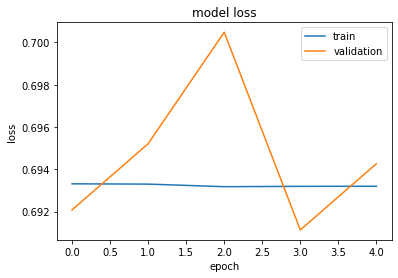

In [76]:
 import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show() 

In [27]:
import tensorflow as tf

In [28]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.SpecificityAtSensitivity(0.5)])


In [29]:
rnn_model.fit(
    x,y,
    validation_data = (x_val,y_val),
    epochs = 3,batch_size=500)  

Epoch 1/3
54/54 [==============================] - 1078s 20s/step - loss: 0.6934 - precision: 0.5009 - recall: 0.4868 - specificity_at_sensitivity: 0.4570 - val_loss: 0.6898 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_specificity_at_sensitivity: 0.0000e+00
Epoch 2/3
54/54 [==============================] - 935s 17s/step - loss: 0.6932 - precision: 0.5000 - recall: 0.2150 - specificity_at_sensitivity: 0.0000e+00 - val_loss: 0.6990 - val_precision: 0.2943 - val_recall: 1.0000 - val_specificity_at_sensitivity: 0.0000e+00
Epoch 3/3
54/54 [==============================] - 978s 18s/step - loss: 0.6932 - precision: 0.4966 - recall: 0.6034 - specificity_at_sensitivity: 0.2586 - val_loss: 0.6942 - val_precision: 0.2943 - val_recall: 1.0000 - val_specificity_at_sensitivity: 0.0000e+00


In [30]:
rnn_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=[tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()])


In [31]:
rnn_model.fit(
    x,y,
    validation_data = (x_val,y_val),
    epochs = 3,batch_size=500)   

Epoch 1/3
54/54 [==============================] - 895s 16s/step - loss: 0.6932 - true_negatives: 6602.0000 - true_positives: 6721.0000 - false_positives: 6774.0000 - false_negatives: 6655.0000 - val_loss: 0.6927 - val_true_negatives: 3319.0000 - val_true_positives: 0.0000e+00 - val_false_positives: 0.0000e+00 - val_false_negatives: 1384.0000
Epoch 2/3
54/54 [==============================] - 868s 16s/step - loss: 0.6932 - true_negatives: 477.0000 - true_positives: 12853.0000 - false_positives: 12899.0000 - false_negatives: 523.0000 - val_loss: 0.6936 - val_true_negatives: 1.0000 - val_true_positives: 1383.0000 - val_false_positives: 3318.0000 - val_false_negatives: 1.0000
Epoch 3/3
54/54 [==============================] - 889s 16s/step - loss: 0.6932 - true_negatives: 10302.0000 - true_positives: 2924.0000 - false_positives: 3074.0000 - false_negatives: 10452.0000 - val_loss: 0.6920 - val_true_negatives: 3319.0000 - val_true_positives: 0.0000e+00 - val_false_positives: 0.0000e+00 - va